In [39]:
#### Assignment1
#### This script includes the implementation of the Decision tree for the Amazon Sentiment Analysis Dataset.
#### It takes the following libararies - NLTK, pandas, numpy, string, matplotlib, scipy, sklearn.
### @Author: Chaitanya Sri Krishna Lolla, Student ID: 800960353

### Libraries.
import pandas as pd
import numpy as np
import nltk
import string
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sparse

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from nltk.corpus import stopwords
from sklearn.tree import DecisionTreeClassifier

In [40]:
### Reading the Given Training Dataset.
reviews = pd.read_csv('amazon_baby_train.csv')
reviews.shape
reviews = reviews.dropna()
reviews.shape
#print(reviews.head(25))

### Converting the Training dataset to follow binary classification with only positive and negative.
### Here the rating above three is considered positive and less than or equal to three are considered as negative cases.
scores = reviews['rating']
reviews['rating'] = reviews['rating'].apply(lambda x: 'pos' if x >= 3 else 'neg')
#print(reviews.head(25))

### Mean calculation of the Rating .
scores.mean()

4.120430078052725

In [41]:
### Distribution of the Ratings.
reviews.groupby('rating')['review'].count()

rating
neg     21089
pos    124838
Name: review, dtype: int64

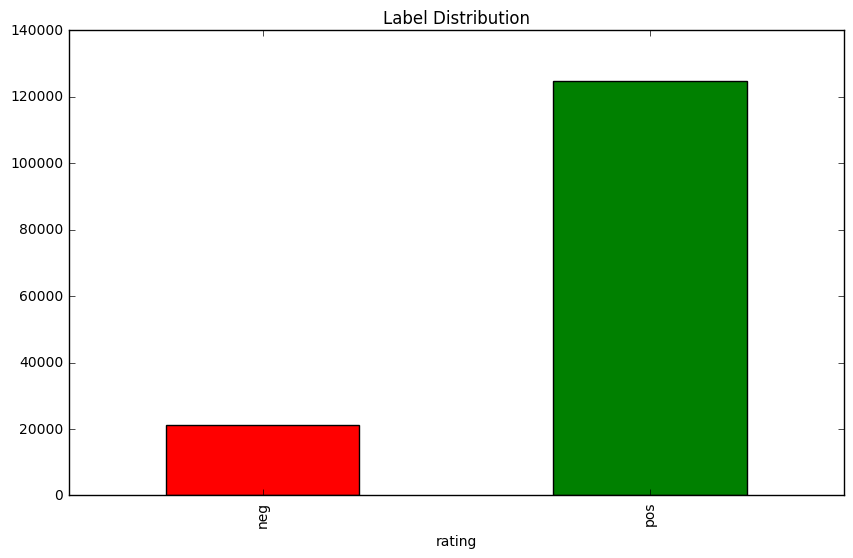

In [42]:
### Distribution plot of the Ratings.
reviews.groupby('rating')['review'].count().plot(kind='bar', color= ['r','g'],title='Label Distribution',  figsize = (10,6))

In [43]:
### This function splits the rating into positive or negative and returns the indices of them in the given array.
def splitPosNeg(Summaries):
    neg = reviews.loc[Summaries['rating']== 'neg']
    pos = reviews.loc[Summaries['rating']== 'pos']
    return [pos,neg]
    

In [44]:
[pos,neg] = splitPosNeg(reviews)

In [45]:
##This step includes pre processing of the review data with the NLP Tool kit .
## This Lemmitizes (Noun, Verb etc of same word is considered as one word) the word
## stems the unnecessary words removing the punctuation.

#stemmer = PorterStemmer()
lemmatizer = nltk.WordNetLemmatizer()
stop = stopwords.words('english')
translation = str.maketrans(string.punctuation,' '*len(string.punctuation))

#filtered_words = [word for word in word_list if word not in stopwords.words('english')]

def preprocessing(line):
    tokens=[]
    line = line.translate(translation)
    line = nltk.word_tokenize(line.lower())
    #line = [word for word in line if word not in stopwords.words('english')]
    for t in line:
        #if(t not in stop):
            #stemmed = stemmer.stem(t)
        stemmed = lemmatizer.lemmatize(t)
        tokens.append(stemmed)
    return ' '.join(tokens)

In [46]:
### Splitting the positive and negative words using the preprocessing method we have written.
pos_data = []
neg_data = []
for p in pos['review']:
    pos_data.append(preprocessing(p))

for n in neg['review']:
    neg_data.append(preprocessing(n))
print("Done")

Done


In [47]:
### Concatenating the positive and negative data into a single array and also the labels corrosponding to them.
data = pos_data + neg_data
labels = np.concatenate((pos['rating'].values,neg['rating'].values))
#print(labels)

In [48]:
### Splitting the training data set into training and validation datasets. (Pruning - with 75% - 25% Split of training data.)
[Data_train,Data_test,Train_labels,Test_labels] = train_test_split(data,labels , test_size=0.25, random_state=20160121,stratify=labels)

In [49]:
### Tokenize the words in the given training data.
t = []
for line in data:
    l = nltk.word_tokenize(line)
    for w in l:
        t.append(w)
#print(t)

In [50]:
### Identifying the counts of the words.
word_features = nltk.FreqDist(t)
print(len(word_features))

55669


In [51]:
## Displaying what are the counts of the topwords .
topwords = [fpair[0] for fpair in list(word_features.most_common(5000))]
print(word_features.most_common(25))

[('the', 611968), ('it', 399752), ('i', 375573), ('and', 365315), ('a', 340757), ('to', 334813), ('is', 205617), ('this', 178855), ('for', 173482), ('my', 147970), ('of', 146494), ('in', 144299), ('that', 121925), ('with', 100826), ('on', 100723), ('wa', 93101), ('but', 92952), ('have', 92851), ('we', 91151), ('t', 88530), ('so', 83602), ('not', 80912), ('s', 77136), ('you', 73961), ('baby', 70749)]


In [52]:
## Checking what are the most common words used from the above.
word_his = pd.DataFrame(word_features.most_common(200), columns = ['words','count'])
#print(word_his)

In [53]:
### Count Vectorizer is used to convert the text into a matrix that contains the count of each word.
vec = CountVectorizer()
c_fit = vec.fit_transform([' '.join(topwords)])

In [54]:
### TFID Transformer is used for normalization of the above matrix we have formed using the topwords.
tf_vec = TfidfTransformer()
tf_fit = tf_vec.fit_transform(c_fit)

In [55]:
#### This step is used for forming the training features that we are going to give to our classification problem.
ctr_features = vec.transform(data)
tr_features = tf_vec.transform(ctr_features)

In [56]:
tr_features.shape

(145927, 4967)

In [57]:
#cte_features = vec.transform(Data_test)
#te_features = tf_vec.transform(cte_features)

In [58]:
### Decision Tree classifier for the given training features we have formed.
### Prediction on the training dataset and accuracy calculation.
### The maximum depth of the decision tree is considered to be 10 after lot of testing with many parameters.
clf = DecisionTreeClassifier(max_depth= 10)
clf = clf.fit(tr_features, labels)
tfPredication = clf.predict(tr_features)
tfAccuracy = metrics.accuracy_score(tfPredication,labels)
print(tfAccuracy)

0.885243991859


In [59]:
### Summary of various metrics.
print(metrics.classification_report(labels, tfPredication))

             precision    recall  f1-score   support

        neg       0.76      0.30      0.43     21089
        pos       0.89      0.98      0.94    124838

avg / total       0.87      0.89      0.86    145927



In [60]:
#### Testing Dataset and its prediction following the above same procedure.

In [61]:
reviews = pd.read_csv('amazon_baby_test.csv')
reviews.shape
reviews = reviews.dropna()
reviews.shape
#print(reviews.head(25))

scores = reviews['rating']
reviews['rating'] = reviews['rating'].apply(lambda x: 'pos' if x >= 3 else 'neg')
#print(reviews.head(25))


scores.mean()

4.11421674849823

In [62]:
reviews.groupby('rating')['review'].count()

rating
neg     5272
pos    31185
Name: review, dtype: int64

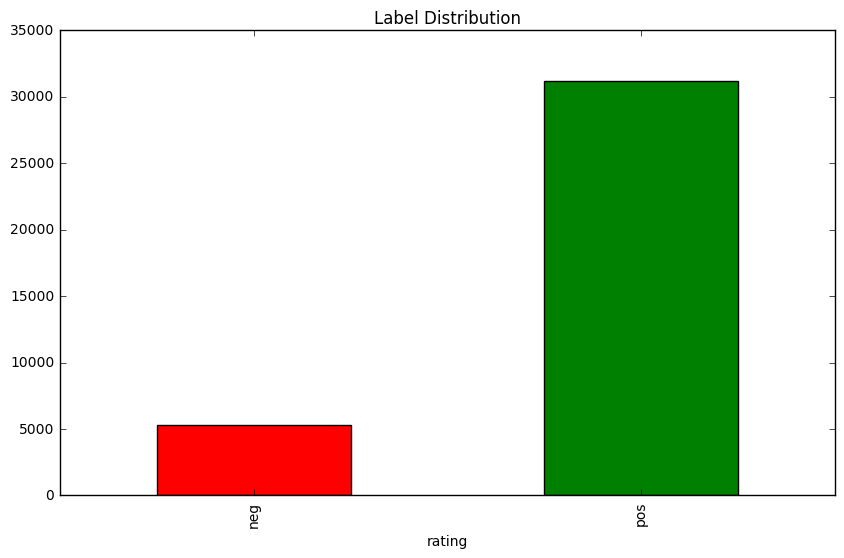

In [63]:
reviews.groupby('rating')['review'].count().plot(kind='bar', color= ['r','g'],title='Label Distribution',  figsize = (10,6))

In [64]:
[pos,neg] = splitPosNeg(reviews)

In [65]:
pos_data = []
neg_data = []
for p in pos['review']:
    pos_data.append(preprocessing(p))

for n in neg['review']:
    neg_data.append(preprocessing(n))
print("Done")

Done


In [66]:
data = pos_data + neg_data
labels = np.concatenate((pos['rating'].values,neg['rating'].values))
#print(labels)

In [67]:
t = []
for line in data:
    l = nltk.word_tokenize(line)
    for w in l:
        t.append(w)
#print(t)

In [68]:
word_features = nltk.FreqDist(t)
print(len(word_features))

27948


In [69]:
topwords = [fpair[0] for fpair in list(word_features.most_common(5002))]
print(word_features.most_common(25))

[('the', 152974), ('it', 99372), ('i', 92497), ('and', 90756), ('a', 84853), ('to', 83074), ('is', 50976), ('this', 44481), ('for', 43016), ('of', 36412), ('my', 36323), ('in', 35975), ('that', 30261), ('on', 25113), ('with', 24842), ('wa', 23367), ('but', 23304), ('we', 22722), ('have', 22648), ('t', 21890), ('so', 20815), ('not', 20502), ('s', 19603), ('you', 18328), ('baby', 17687)]


In [70]:
word_his = pd.DataFrame(word_features.most_common(200), columns = ['words','count'])
#print(word_his)

In [71]:
len(topwords)

5002

In [72]:
vec = CountVectorizer()
c_fit = vec.fit_transform([' '.join(topwords)])

In [73]:
tf_vec = TfidfTransformer()
tf_fit = tf_vec.fit_transform(c_fit)

In [74]:
cte_features = vec.transform(data)
te_features = tf_vec.transform(cte_features)

In [75]:
te_features.shape

(36457, 4967)

In [76]:
### Prediction of the Given Testing dataset and its accuracy.
tePredication = clf.predict(te_features)
teAccuracy = metrics.accuracy_score(tePredication,labels)
print(teAccuracy)

0.839564418356


In [77]:
print(metrics.classification_report(labels, tePredication))

             precision    recall  f1-score   support

        neg       0.24      0.05      0.08      5272
        pos       0.86      0.97      0.91     31185

avg / total       0.77      0.84      0.79     36457

